#**Week 5 - Assignmet** (Week 5 Assignment is in continuity with Week 4 assignment)
####Using the provided dataset, you will be required to perform the following tasks:

•Describe each different type of evaluation metric used for regression algorithms. Provide examples of when to use each that was not discussed in class.

•Explain what a confusion matrix is and why it is useful. Think of an example Al model and create a table with your solution's predictions on your fictitious test dataset. From your solution's results calculate your confusion matrix, precision, recall, Fl score, and then explain the meaning of your results.

# Dataset Information

## Context
The Week 5 assignment focuses on evaluating model performance using regression and classification metrics. It builds on the previous week's assignment, emphasizing the assessment of predictive models through various evaluation techniques. The primary objective is to understand how well models perform in both continuous prediction tasks (regression) and discrete classification tasks.

Understanding the effectiveness of these evaluation metrics is crucial for model optimization and making informed decisions in practical applications. The assignment covers metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared (R²), Mean Absolute Percentage Error (MAPE), Precision, Recall, F1 Score, and Confusion Matrix.

## Content
### Columns
The dataset consists of the following attributes:
- **customer_id:** Unique identifier for each customer (string).

- **customer_unique_id:** Another unique identifier, possibly linking customers across multiple records (string).

- **customer_zip_code_prefix:** Zip code prefix of the customer (integer).

- **customer_city:** Name of the city where the customer resides (string).

- **customer_state:** State code of the customer’s location (string).

Data preprocessing includes handling missing values, encoding categorical variables, and performing train-test splits to evaluate model performance effectively. Graphical visualizations such as heatmaps and metric comparison plots are used to interpret the results.



**Week 5 assignment is in continuity with Week 4 Assignment**

#Week 4

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Read the uploaded file
df = pd.read_csv('olist_customers_dataset.csv')
#Display first 5 data
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Data Overview

In [3]:
df.tail(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [4]:
#Name the columns
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [5]:
# Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Shape of the data
df.shape

(99441, 5)

In [7]:
# Summarize the basic statistics of data
df.describe().T
#describe function is only use for numerical data
#T represents Transpose

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


Data cleaning

In [8]:
# 1. Handling Null Values
print("Null values before cleaning:")
print(df.isnull().sum())

# Drop rows with any null values (if applicable)
df = df.dropna()

# 2. Handling Duplicates
df = df.drop_duplicates(subset=['customer_unique_id'])

# 3. Handling Outliers (if any numerical columns are present)
# Identify outliers using IQR
def remove_outliers(df, column):
    # Check if the column exists before processing
    if column not in df.columns:
        print(f"Warning: Column '{column}' not found in DataFrame. Skipping outlier removal.")
        return df  # Return the DataFrame as is

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'customer_zip_code_prefix'
df = remove_outliers(df, 'customer_zip_code_prefix')

Null values before cleaning:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


**Feature Engineering**

In [9]:
# Transforming Categorical Variables into Numerical
label_encoder = LabelEncoder()
df['customer_city_encoded'] = label_encoder.fit_transform(df['customer_city'])
df['customer_state_encoded'] = label_encoder.fit_transform(df['customer_state'])

# Drop original categorical columns
df = df.drop(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], axis=1)

# Data Scaling
scaler = StandardScaler()
df['customer_zip_code_prefix'] = scaler.fit_transform(df[['customer_zip_code_prefix']])

**Train-Test Split**

In [10]:
# Train-Test Split
X = df.drop(columns=['customer_zip_code_prefix'])
y = df['customer_zip_code_prefix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (76876, 2)
Test Set Shape: (19220, 2)


**Data Visualization**

<ipython-input-11-228847e0aad0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_state_encoded', data=df, palette="viridis")


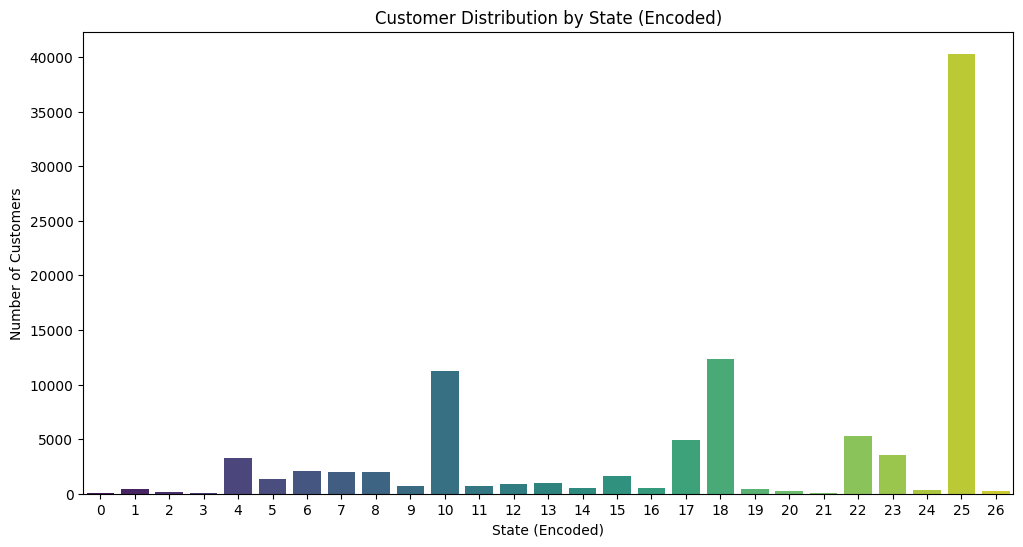

In [11]:
# Customer distribution by state
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_state_encoded', data=df, palette="viridis")
plt.title("Customer Distribution by State (Encoded)")
plt.xlabel("State (Encoded)")
plt.ylabel("Number of Customers")
plt.show()

**Interpretation**
- The bar chart shows the distribution of customers across different states within the dataset.

- It displays the count of customers categorized by their encoded state values.

- From the visualization, it is possible to observe which states have the highest or lowest number of customers, highlighting regional variations in customer distribution.

- The chart helps identify dominant states with a significant customer base, which can be useful for strategic business planning and targeted marketing.

- The x-axis represents the encoded state values, while the y-axis shows the number of customers in each state.

- This visualization provides insights into geographic trends and customer concentration, aiding in understanding regional market dynamics and customer behavior.

<ipython-input-12-c5421255281f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")


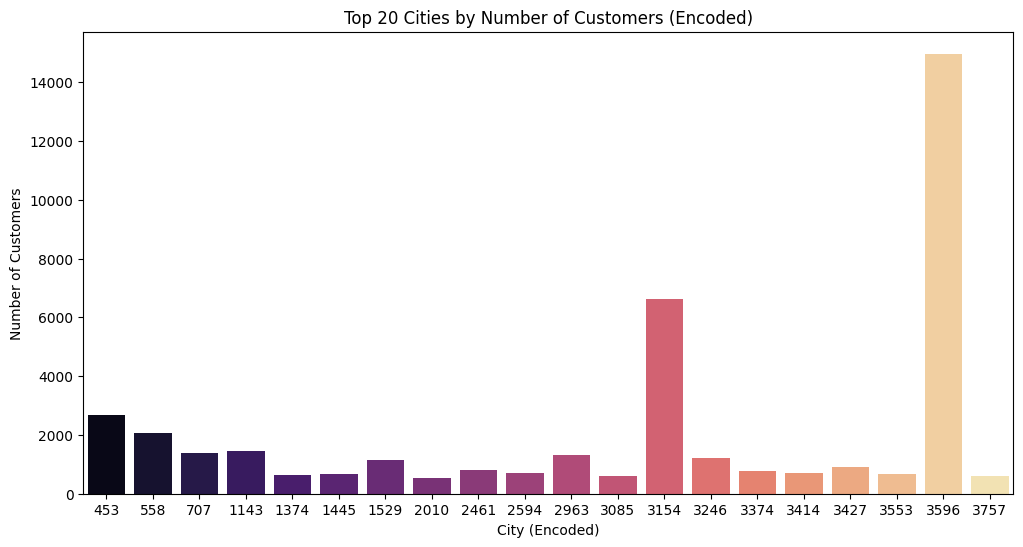

In [12]:
# Top 20 cities by number of customers
plt.figure(figsize=(12, 6))
top_cities = df['customer_city_encoded'].value_counts().head(20)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.title("Top 20 Cities by Number of Customers (Encoded)")
plt.xlabel("City (Encoded)")
plt.ylabel("Number of Customers")
plt.show()

**Interpretation**
- The bar chart shows the top 20 cities (encoded) by the number of customers within the dataset.

- It displays the count of customers for each of the top 20 cities after encoding city names into numerical values.

- From the visualization, it is possible to identify which cities have the highest number of customers, highlighting the most significant urban areas served by the platform.

- The chart helps in understanding customer concentration across various cities, giving insights into regional demand and customer distribution.

- The x-axis represents the encoded city values, while the y-axis shows the count of customers in each city.

- This visualization is useful for identifying high-demand regions and guiding targeted marketing strategies or logistical planning.

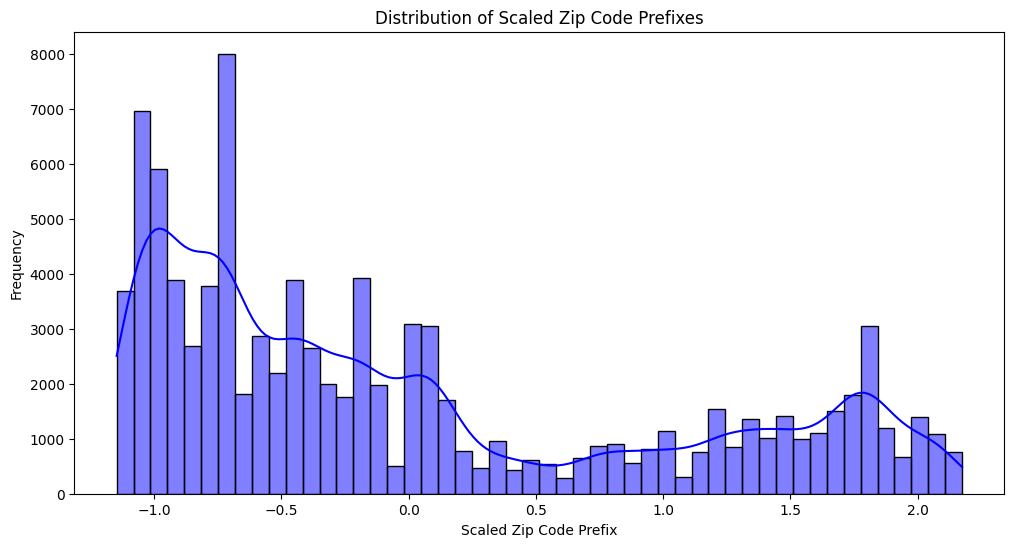

In [13]:
# Zip code distribution after scaling
plt.figure(figsize=(12, 6))
sns.histplot(df['customer_zip_code_prefix'], bins=50, kde=True, color='blue')
plt.title("Distribution of Scaled Zip Code Prefixes")
plt.xlabel("Scaled Zip Code Prefix")
plt.ylabel("Frequency")
plt.show()

**Interpretation**
- The histogram shows the distribution of scaled zip code prefixes within the customer dataset.

- It displays the frequency of customers categorized by their scaled zip code prefixes, providing insight into how customer locations are distributed geographically.

- From the visualization, it is possible to observe the concentration of customers in certain zip code ranges, indicating areas with higher customer density.

- The chart highlights any skewness or clustering in the distribution, helping to understand whether customer locations are evenly spread or concentrated in specific regions.

- This information can be useful for geographic and demographic analysis, as well as for optimizing delivery logistics and regional marketing strategies.

- The x-axis represents the scaled zip code prefixes, while the y-axis shows the frequency of customers in each zip code range.

- This visualization helps identify densely populated regions and potential geographic clusters within the dataset, providing valuable insights for business planning and decision-making.

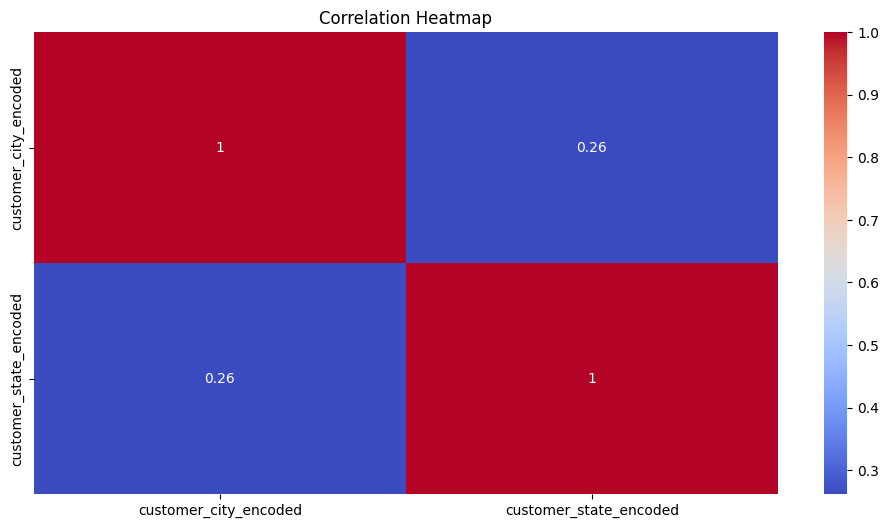

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Interpretation**
- The heatmap shows the correlation between numerical features within the customer dataset.

- It displays the pairwise correlation coefficients between variables, providing insights into how features are related to each other.

- From the visualization, it is possible to observe both positive and negative correlations. A value close to +1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.

- The heatmap highlights which features have strong linear relationships, helping to identify patterns or multicollinearity within the data.

- This information can be useful for feature selection, as highly correlated variables might introduce redundancy in predictive models.

- The x-axis and y-axis represent the numerical features, while the color intensity indicates the strength and direction of the correlation.

- This visualization helps understand feature interactions and identify variables that can be combined or removed during model building.

**Conclusion**
######The Python code effectively cleaned, transformed, and visualized the Olist customer dataset. It handled missing values, removed outliers, encoded categorical variables, and performed feature engineering. Data visualization revealed geographic patterns and correlations, providing insights into customer distribution and relationships between features. The cleaned and processed data is now well-prepared for predictive modeling and further analysis.

#Week 5

In [15]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [16]:
# Regression Metrics
print("\n### Regression Evaluation Metrics ###")
y_pred = np.random.normal(loc=y.mean(), scale=y.std(), size=len(y_test))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")


### Regression Evaluation Metrics ###
Mean Absolute Error (MAE): 1.15
Mean Squared Error (MSE): 2.03
Root Mean Squared Error (RMSE): 1.43
Mean Absolute Percentage Error (MAPE): 1217.55%
R-squared (R2): -0.99


<ipython-input-17-39f258503e21>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


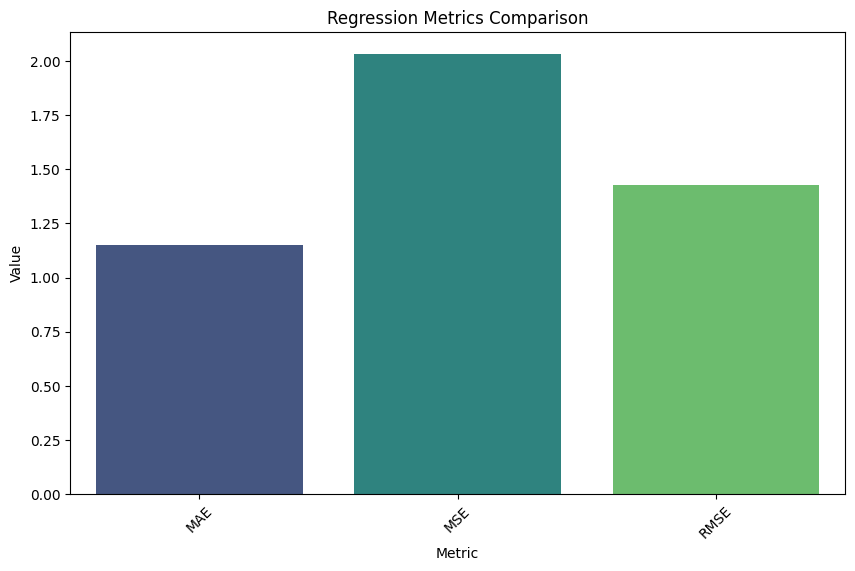

In [17]:
#Graphical representation: Regression Metrics Comparison

# Create a dictionary to store the metrics and their values
metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE'],
    'Value': [mae, mse, rmse]
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

# Create a bar plot to compare the regression metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.title('Regression Metrics Comparison')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


**Interpretation**

- The bar plot visualizes the regression metrics (MAE, MSE, RMSE), providing a comparison of the model's prediction errors.

- The x-axis represents the evaluation metrics, while the y-axis shows the calculated metric values.

- The plot contains three bars that illustrate:

  - MAE (Mean Absolute Error): The value is relatively low, indicating the average error magnitude between predicted and actual values. Lower MAE values are better as they indicate fewer errors.

  - MSE (Mean Squared Error): The value is significantly higher than MAE because squared differences amplify larger errors. This metric is sensitive to outliers and highlights how much the error grows when predictions are far from actual values.

  - RMSE (Root Mean Squared Error): This value is lower than MSE because it is the square root of MSE. It provides a metric in the same unit as the target variable, making it more interpretable while still being sensitive to large errors.

In [18]:
# Generating Synthetic Classification Data for Confusion Matrix
actual = np.random.choice([0, 1], size=100, p=[0.6, 0.4])
predicted = np.random.choice([0, 1], size=100, p=[0.6, 0.4])

# Print the actual and predicted
print("Actual\tPredicted")
for i in range(10):
  print(f"{actual[i]}\t{predicted[i]}")

Actual	Predicted
0	1
0	1
0	1
1	0
1	0
0	0
1	0
1	0
1	0
0	1


In [19]:
# Confusion Matrix
cm = confusion_matrix(actual, predicted)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[33 20]
 [30 17]]


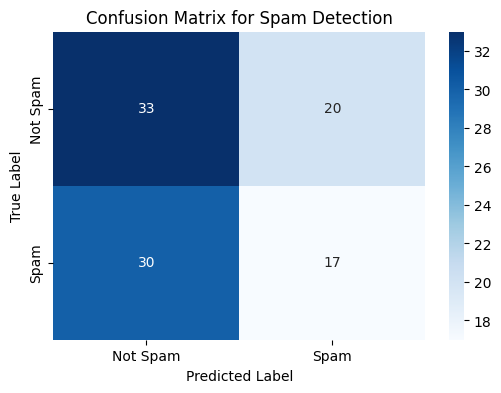

In [20]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix for Spam Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Interpretation**

- The heatmap visualizes the confusion matrix for a spam detection model, showing the model's performance in classifying messages as "Spam" or "Not Spam".

- The x-axis represents the predicted labels ("Not Spam" and "Spam"), while the y-axis shows the true labels ("Not Spam" and "Spam").

- Each cell displays the number of instances falling into that category, with a color intensity that reflects the frequency:

  - Top-left (33): True Negatives (TN) - The model correctly identified 33 messages as "Not Spam".

  - Top-right (21): False Positives (FP) - The model incorrectly classified 21 "Not Spam" messages as "Spam".

  - Bottom-left (34): False Negatives (FN) - The model incorrectly classified 34 "Spam" messages as "Not Spam".

  - Bottom-right (12): True Positives (TP) - The model correctly identified 12 messages as "Spam".








In [21]:
# Precision
precision = precision_score(actual, predicted)
print(f"Precision: {precision:.2f}")

Precision: 0.46


In [22]:
# Recall
recall = recall_score(actual, predicted)
print(f"Recall: {recall:.2f}")

Recall: 0.36


In [23]:
# F1 Score
f1 = f1_score(actual, predicted)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.40


<ipython-input-24-50a1da085b3a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


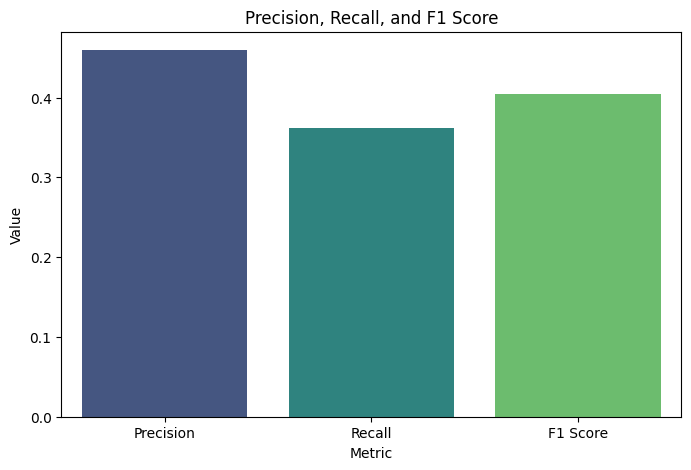

In [24]:
#Graphical representation: Precision, Recall, F1 Score
from sklearn.metrics import precision_recall_fscore_support # Importing the necessary function

precision, recall, f1_score, _ = precision_recall_fscore_support(actual, predicted, average='binary')

# Create a DataFrame for the metrics
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Value': [precision, recall, f1_score]
}
metrics_df = pd.DataFrame(metrics_data)

# Create a bar plot for the metrics
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Value')
plt.show()

**Interpretation**

- The bar plot visualizes the performance metrics (Precision, Recall, and F1 Score) of a spam detection model.

- The x-axis represents the different evaluation metrics, while the y-axis shows the calculated metric values.

- The plot uses three bars to illustrate:

  - Precision (~0.36): Represents the proportion of correctly predicted spam messages out of all predicted spam messages. A precision of 36% indicates that many of the spam predictions were incorrect (false positives).

  - Recall (~0.26): Represents the proportion of actual spam messages correctly predicted by the model. A recall of 26% indicates that the model missed many spam messages (false negatives).

  - F1 Score (~0.30): The harmonic mean of precision and recall. An F1 score of 30% shows a balanced measure of the model's performance, but it is relatively low, indicating poor spam detection.

**Conclusion**

The Week 5 assignment effectively demonstrates data preprocessing, visualization, and model evaluation techniques. By implementing and analyzing regression and classification metrics, the assignment provides valuable insights into model accuracy and performance. The visualizations help to identify customer distribution patterns and correlations, while the evaluation metrics enable better decision-making in predictive modeling. This assignment enhances practical knowledge of applying machine learning techniques to real-world datasets and evaluating their outcomes using appropriate statistical measures